#Aplicação com Pandas em análise de NPS

# Etapa 1 - Organizando os dados

In [ ]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#carregando o dataset
from google.colab import files
uploaded = files.upload()

Saving Assignment_base de dados - Sheet1.csv to Assignment_base de dados - Sheet1.csv


In [ ]:
df = pd.read_csv('Assignment_base de dados - Sheet1.csv')
df.head()

,Plano fechado,NPS,ID_Pedido
0,Basic,7,3880.0
1,Basic,5,3040.0
2,Premium,7,4332.0
3,Enteprise,5,6913.0
4,Basic,7,5107.0


In [ ]:
#verificando os tipos de variáveis
df.dtypes

Plano fechado     object
NPS                int64
ID_Pedido        float64
dtype: object

In [ ]:
#convertendo para objeto os valores de ID_Pedido
df['ID_Pedido']= df['ID_Pedido'].astype('object')
df.dtypes

Plano fechado    object
NPS               int64
ID_Pedido        object
dtype: object

In [ ]:
df.describe()

,NPS
count,9260.000000
mean,6.844600
std,2.317572
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


In [ ]:
#Verificando a quantidade de null
mask1 = pd.isnull(df['NPS'])
df[mask1]

,Plano fechado,NPS,ID_Pedido


In [ ]:
mask2 =pd.isnull(df['ID_Pedido'])
df[mask2]

,Plano fechado,NPS,ID_Pedido
2756,Premium,9,NaN
5389,Enteprise,1,NaN
6926,Basic,2,NaN
8155,Enteprise,5,NaN


In [ ]:
mask3=pd.isnull(df['Plano fechado'])
df[mask3]

,Plano fechado,NPS,ID_Pedido
146,NaN,5,4852
232,NaN,5,7159
7046,NaN,5,6007
9123,NaN,9,1406


In [ ]:
#removendo os valores nulos
df_2 =df.dropna()
df_2

,Plano fechado,NPS,ID_Pedido
0,Basic,7,3880.0
1,Basic,5,3040.0
2,Premium,7,4332.0
3,Enteprise,5,6913.0
4,Basic,7,5107.0
...,...,...,...
9255,Premium,4,5078.0
9256,Enteprise,5,5844.0
9257,Basic,7,6761.0
9258,Enteprise,7,4087.0


In [ ]:
#conferindo se todos os nulls foram removidos
df_2.isnull().sum()

Plano fechado    0
NPS              0
ID_Pedido        0
dtype: int64

In [ ]:
df_2.set_index('ID_Pedido', inplace=True)
df_2

,Plano fechado,NPS
ID_Pedido,,
3880.0,Basic,7
3040.0,Basic,5
4332.0,Premium,7
6913.0,Enteprise,5
5107.0,Basic,7
...,...,...
5078.0,Premium,4
5844.0,Enteprise,5
6761.0,Basic,7


# 1.1 Basic

In [ ]:
#Filtrando apenas os planos "Basic"
Basic = df_2[df_2['Plano fechado']=='Basic']
Basic

,Plano fechado,NPS
ID_Pedido,,
3880.0,Basic,7
3040.0,Basic,5
5107.0,Basic,7
1788.0,Basic,5
7639.0,Basic,10
...,...,...
1904.0,Basic,8
5336.0,Basic,8
6933.0,Basic,4


In [ ]:
Basic_describe = Basic.describe()
Basic_describe

,NPS
count,4304.000000
mean,6.856645
std,2.315592
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


In [ ]:
#filtrando apenas NPS 1-6
Basic_Red = Basic.query('6>= NPS >=1')
Basic_Red

,Plano fechado,NPS
ID_Pedido,,
3040.0,Basic,5
1788.0,Basic,5
7408.0,Basic,5
4095.0,Basic,6
3170.0,Basic,5
...,...,...
3042.0,Basic,4
2592.0,Basic,4
3854.0,Basic,6


In [ ]:
print(Basic_Red.value_counts(),'\n',len(Basic_Red))

Plano fechado  NPS
Basic          5      589
               6      584
               4      280
               2      119
               3      117
               1      115
dtype: int64 
 1804


In [ ]:
#porcentagem de valores Basic com NPS entre 1-6
Basic_Red_porc = len(Basic_Red)/len(Basic)
Basic_Red_porc

0.4191449814126394

In [ ]:
#filtrando NPS 7-8
Basic_Yellow = Basic.query('8>= NPS >=7')
Basic_Yellow 

,Plano fechado,NPS
ID_Pedido,,
3880.0,Basic,7
5107.0,Basic,7
3408.0,Basic,8
1504.0,Basic,8
2781.0,Basic,8
...,...,...
4955.0,Basic,8
1904.0,Basic,8
5336.0,Basic,8


In [ ]:
print(Basic_Yellow.value_counts(),'\n',len(Basic_Yellow))

Plano fechado  NPS
Basic          7      634
               8      610
dtype: int64 
 1244


In [ ]:
#porcentagem de valores Basic com NPS entre 7-8
Basic_Yellow_porc = len(Basic_Yellow)/len(Basic)
Basic_Yellow_porc

0.28903345724907065

In [ ]:
#filtrando NPS 9-10
Basic_Green = Basic.query('10>= NPS >=9')
Basic_Green

,Plano fechado,NPS
ID_Pedido,,
7639.0,Basic,10
1697.0,Basic,9
4925.0,Basic,9
1892.0,Basic,9
2990.0,Basic,9
...,...,...
1513.0,Basic,9
7621.0,Basic,9
3395.0,Basic,9


In [ ]:
print(Basic_Green.value_counts(),'\n',len(Basic_Green))

Plano fechado  NPS
Basic          9      640
               10     616
dtype: int64 
 1256


In [ ]:
#porcentagem de valores Basic com NPS entre 9-10
Basic_Green_porc = len(Basic_Green)/len(Basic)
Basic_Green_porc

0.29182156133828996

#1.2 Enterprise

In [ ]:
#Filtrando apenas os planos Enterprise
Enterprise = df_2[df_2['Plano fechado']=="Enteprise"]
Enterprise

,Plano fechado,NPS
ID_Pedido,,
6913.0,Enteprise,5
4408.0,Enteprise,10
5493.0,Enteprise,7
5162.0,Enteprise,7
1553.0,Enteprise,5
...,...,...
5201.0,Enteprise,8
2081.0,Enteprise,10
5844.0,Enteprise,5


In [ ]:
Enterprise_describe = Enterprise.describe()
Enterprise_describe

,NPS
count,2859.000000
mean,6.883526
std,2.300258
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


In [ ]:
#filtrando apenas NPS 1-6
Enterprise_Red = Enterprise.query('6>= NPS >=1')
Enterprise_Red

,Plano fechado,NPS
ID_Pedido,,
6913.0,Enteprise,5
1553.0,Enteprise,5
2575.0,Enteprise,5
3216.0,Enteprise,6
2610.0,Enteprise,5
...,...,...
4995.0,Enteprise,5
2247.0,Enteprise,6
7645.0,Enteprise,5


In [ ]:
print(Enterprise_Red.value_counts(),'\n',len(Enterprise_Red))

Plano fechado  NPS
Enteprise      5      415
               6      366
               4      143
               2       93
               3       77
               1       72
dtype: int64 
 1166


In [ ]:
#porcentagem de valores Enterprise com NPS entre 1-6
Enterprise_Red_porc = len(Enterprise_Red)/len(Enterprise)
Enterprise_Red_porc

0.40783490731024835

In [ ]:
#filtrando apenas NPS 7-8
Enterprise_Yellow = Enterprise.query('8>= NPS >=7')
Enterprise_Yellow

,Plano fechado,NPS
ID_Pedido,,
5493.0,Enteprise,7
5162.0,Enteprise,7
1074.0,Enteprise,8
3492.0,Enteprise,8
7706.0,Enteprise,8
...,...,...
5505.0,Enteprise,7
4570.0,Enteprise,8
7501.0,Enteprise,7


In [ ]:
print(Enterprise_Yellow.value_counts(),'\n',len(Enterprise_Yellow))

Plano fechado  NPS
Enteprise      8      465
               7      407
dtype: int64 
 872


In [ ]:
#porcentagem de valores Enterprise com NPS entre 7-8
Enterprise_Yellow_porc = len(Enterprise_Yellow)/len(Enterprise)
Enterprise_Yellow_porc

0.3050017488632389

In [ ]:
#filtrando apenas NPS 9-10
Enterprise_Green = Enterprise.query('10>= NPS >=9')
Enterprise_Green

,Plano fechado,NPS
ID_Pedido,,
4408.0,Enteprise,10
4798.0,Enteprise,9
5641.0,Enteprise,10
3508.0,Enteprise,10
7592.0,Enteprise,10
...,...,...
2382.0,Enteprise,9
3083.0,Enteprise,10
1238.0,Enteprise,10


In [ ]:
print(Enterprise_Green.value_counts(),'\n',len(Enterprise_Green))

Plano fechado  NPS
Enteprise      9      431
               10     390
dtype: int64 
 821


In [ ]:
#porcentagem de valores Enterprise com NPS entre 9-10
Enterprise_Green_porc = len(Enterprise_Green)/len(Enterprise)
Enterprise_Green_porc

0.28716334382651276

#1.3 Premium

In [ ]:
#filtrando apenas os planos Premium 
Premium = df_2[df_2['Plano fechado']=="Premium"]
Premium

,Plano fechado,NPS
ID_Pedido,,
4332.0,Premium,7
7336.0,Premium,5
2077.0,Premium,6
5027.0,Premium,6
5276.0,Premium,10
...,...,...
3949.0,Premium,9
3099.0,Premium,8
1320.0,Premium,8


In [ ]:
Premium_describe = Premium.describe()
Premium_describe

,NPS
count,2089.000000
mean,6.773097
std,2.340757
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


In [ ]:
#filtrando apenas NPS 1-6
Premium_Red = Premium.query('6>= NPS >=1')
Premium_Red

,Plano fechado,NPS
ID_Pedido,,
7336.0,Premium,5
2077.0,Premium,6
5027.0,Premium,6
2861.0,Premium,6
2788.0,Premium,6
...,...,...
2981.0,Premium,5
7118.0,Premium,5
2651.0,Premium,6


In [ ]:
print(Premium_Red.value_counts(),'\n',len(Premium_Red))

Plano fechado  NPS
Premium        5      328
               6      309
               4      138
               3       67
               2       55
               1       55
dtype: int64 
 952


In [ ]:
#porcentagem de valores Premium com NPS entre 1-6
Premium_Red_porc = len(Premium_Red)/len(Premium)
Premium_Red_porc

0.4557204404021063

In [ ]:
#filtrando apenas NPS 7-8
Premium_Yellow = Premium.query('8>= NPS >=7')
Premium_Yellow

,Plano fechado,NPS
ID_Pedido,,
4332.0,Premium,7
3123.0,Premium,8
4924.0,Premium,8
1211.0,Premium,8
4978.0,Premium,7
...,...,...
2188.0,Premium,7
5083.0,Premium,7
2512.0,Premium,7


In [ ]:
print(Premium_Yellow.value_counts(),'\n',len(Premium_Yellow))

Plano fechado  NPS
Premium        7      281
               8      252
dtype: int64 
 533


In [ ]:
#porcentagem de valores Premium com NPS entre 1-6
Premium_Yellow_porc = len(Premium_Yellow)/len(Premium)
Premium_Yellow_porc

0.25514600287218764

In [ ]:
#filtrando apenas NPS 9-10
Premium_Green = Premium.query('10>= NPS >=9')
Premium_Green

,Plano fechado,NPS
ID_Pedido,,
5276.0,Premium,10
5623.0,Premium,9
5936.0,Premium,10
2081.0,Premium,10
5471.0,Premium,10
...,...,...
5632.0,Premium,10
6035.0,Premium,10
4081.0,Premium,9


In [ ]:
print(Premium_Green.value_counts(),'\n',len(Premium_Green))

Plano fechado  NPS
Premium        10     318
               9      286
dtype: int64 
 604


In [ ]:
#porcentagem de valores Premium com NPS entre 1-6
Premium_Green_porc = len(Premium_Green)/len(Premium)
Premium_Green_porc

0.28913355672570606

# Etapa 2 - Investigando e visualizando os dados

In [ ]:
#plotando a relação entre Plano fechado x NPS
import seaborn as sns 
import plotly.express as px

In [ ]:
px.box(df, x='Plano fechado', y='NPS')

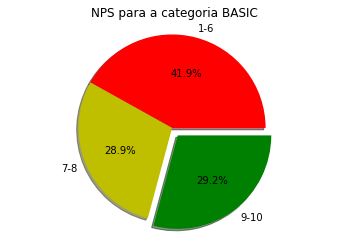

In [ ]:
labels = '1-6', '7-8', '9-10'
sizes=[Basic_Red_porc, Basic_Yellow_porc, Basic_Green_porc]
explode=(0,0,0.1)

fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, shadow= True, autopct='%1.1f%%',colors=['r', 'y','g'])
ax1.axis('equal')
plt.title('NPS para a categoria BASIC')
plt.show()

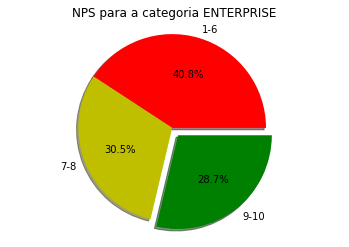

In [ ]:
labels = '1-6', '7-8', '9-10'
sizes=[Enterprise_Red_porc, Enterprise_Yellow_porc, Enterprise_Green_porc]
explode=(0,0,0.1)

fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, shadow= True, autopct='%1.1f%%',colors=['r', 'y','g'])
ax1.axis('equal')
plt.title('NPS para a categoria ENTERPRISE')
plt.show()

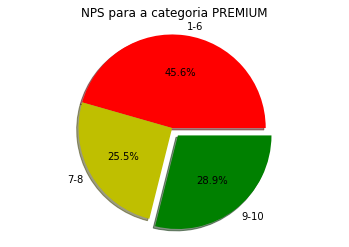

In [ ]:
labels = '1-6', '7-8', '9-10'
sizes=[Premium_Red_porc, Premium_Yellow_porc, Premium_Green_porc]
explode=(0,0,0.1)

fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, shadow= True, autopct='%1.1f%%', colors=['r', 'y','g'])
ax1.axis('equal')
plt.title('NPS para a categoria PREMIUM')
plt.show()

#Conclusão

De acordo com os dados levantados, o serviço Basic apresenta a maior porcentagem de NPS promotor (notas 9 e 10) quando comparado com os serviços Enterprise e Premium. 

Observa-se ainda , que o serviço Premium apresenta a maior porcentagem detratora (notas 1 a 6) quando comparado com os outros serviços

Ao supor uma diferença de preço considerável entre os serviços Basic, Enterprise e Premium, a empresa deveria focar nos serviços menos caros, uma vez que tem agradado mais a sua clientela.